In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime

In [3]:
#Read data from csv file
data = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True)
display(data)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [4]:
#Define the month and year as index
month_year = data.index
print(month_year)
#Define the passengers for each month_year
Passenger = data['#Passengers']

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)


In [5]:
#Use the decompose function to decompose the data into trend, seasonality and residual values
decomposition = seasonal_decompose(Passenger, model='additive')

trend = decomposition.trend
seasonal = decomposition.seasonal
random = decomposition.resid

This code is using the seasonal_decompose function from the statsmodels library. The function takes a time series data, in this case Passenger, and performs a seasonal decomposition of the time series using the specified model, which in this case is 'additive'. The seasonal decomposition is a statistical method used to separate a time series into its constituent parts: trend, seasonality, and residuals. The 'additive' model specifies that the seasonal and residual variations are added to the trend to obtain the original time series. The function returns a DecomposedResult object, which contains the trend, seasonal, and residual components of the time series.

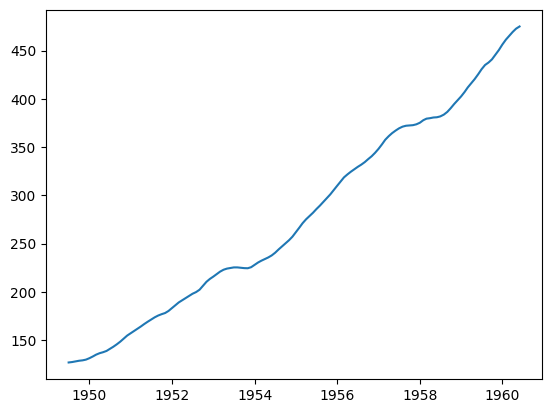

In [6]:
#Graphs
plt.plot(trend)

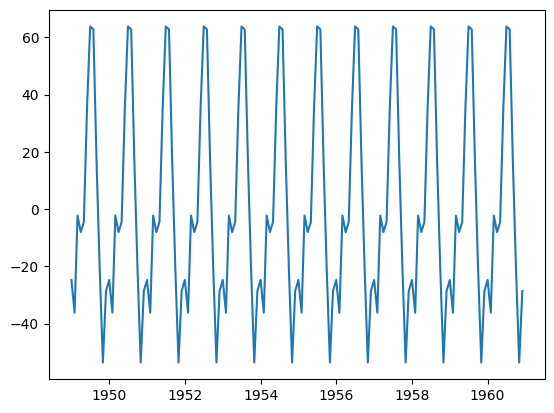

In [7]:
plt.plot(seasonal)

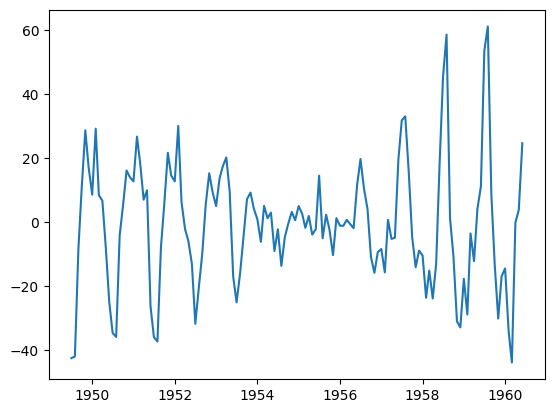

In [8]:
plt.plot(random)

In [9]:
#Determine the first and last year of the data
first_year = datetime.strftime(Passenger.index.min() , '%Y')
last_year = datetime.strftime(Passenger.index.max(), '%Y')

Text(0.5, 0, 'Year')

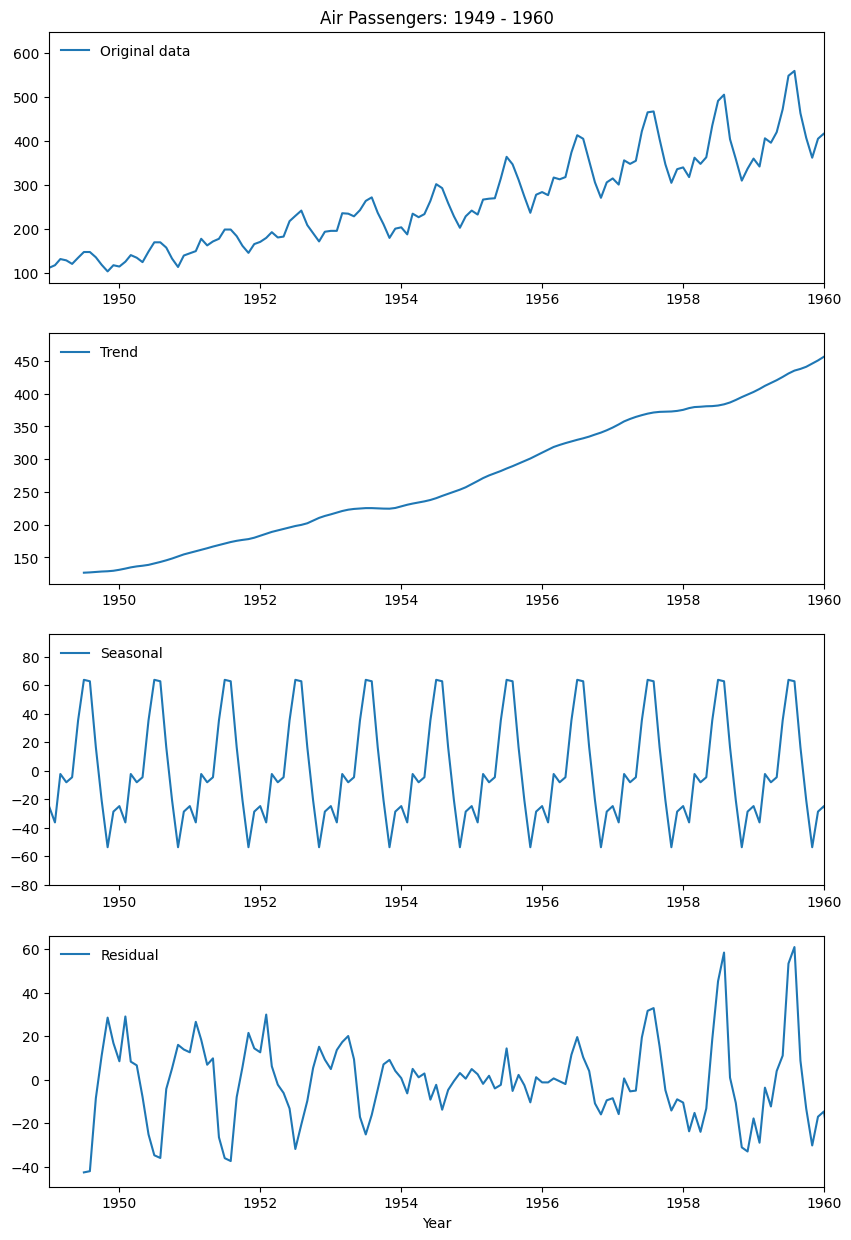

In [10]:
#Merge the trend, seasonality and random values into one subplot

plt.figure(figsize=(10,15))

plt.subplot(4,1,1)
plt.title('Air Passengers: ' + first_year + ' - ' + last_year)
plt.plot(Passenger, label = 'Original data')
plt.legend(loc = 'upper left', frameon = False)
plt.xlim(datetime.strptime(first_year, '%Y'), datetime.strptime(last_year, '%Y'))

#Trend
plt.subplot(4,1,2)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'upper left', frameon = False)
plt.xlim(datetime.strptime(first_year, '%Y'), datetime.strptime(last_year, '%Y'))

#Seasonality
plt.subplot(4,1,3)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'upper left', frameon = False)
plt.xlim(datetime.strptime(first_year, '%Y'), datetime.strptime(last_year, '%Y'))
plt.ylim(np.min(seasonal)*1.5, np.max(seasonal)*1.5)

#Residual
plt.subplot(4,1,4)
plt.plot(random, label = 'Residual')
plt.legend(loc = 'upper left', frameon = False)
plt.xlim(datetime.strptime(first_year, '%Y'), datetime.strptime(last_year, '%Y'))
plt.xlabel('Year')